In [2]:
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

import cv2

from functions import *

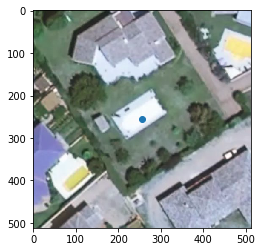

Center color point: 250 252 253


In [3]:
IMG_PATH = 'Images/train'
#ID = 3
#ID = 65
ID = 53

imageFiles = [f for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))]

image = cv2.imread(join(IMG_PATH, imageFiles[ID]))
plt.imshow(image,interpolation='nearest')
plt.scatter(x=256,y=256)
plt.show()

b,g,r = (image[256, 256])
print('Center color point:',b,g,r)


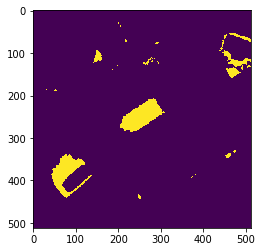

In [4]:
ran = 25

upperBound = np.array([b+ran,g+ran,r+ran])
lowerBound = np.array([b-ran,g-ran,r-ran])
poolDetection = cv2.inRange(image,lowerBound,upperBound)

plt.imshow(poolDetection,interpolation='nearest')
plt.show()

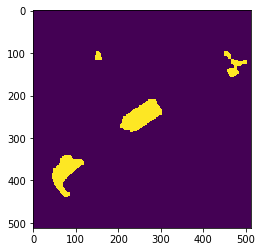

In [5]:
kernel = np.ones((7,7),np.uint8)
poolDetection = cv2.morphologyEx(poolDetection, cv2.MORPH_OPEN, kernel)
poolDetection = cv2.morphologyEx(poolDetection, cv2.MORPH_CLOSE, kernel)

plt.imshow(poolDetection,interpolation='nearest')

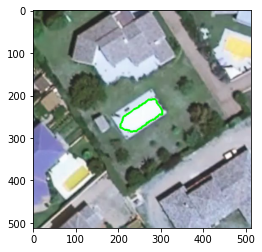

In [6]:
contours, _ = cv2.findContours(poolDetection,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# print(hierarchy)
#print(contours[0])

index = findCenterContour(contours)
c = contours[index]

show = image.copy()
plt.imshow(cv2.drawContours(show,[c], -1, (0,255,0), 3))

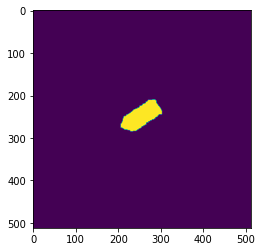

In [7]:
singleCluster = getBinaryFromContour(contours[index])
plt.imshow(singleCluster)

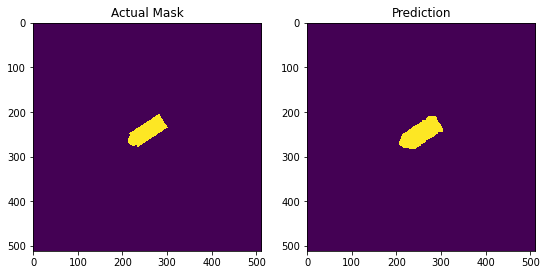

In [11]:
sol = getBinaryImage(imageFiles[ID])

fig = plt.figure(figsize=(9,9))
fig.add_subplot(1,2,1)
plt.title('Actual Mask')
plt.imshow(sol,interpolation='nearest')
fig.add_subplot(1,2,2)
plt.title('Prediction')
plt.imshow(singleCluster,interpolation='nearest')

Accuracy 0.9964065551757812
{'True1': 0.9802986971719098, 'True0': 0.9966022772464546, 'False1': 0.0033977227535454077, 'False0': 0.019701302828090246}


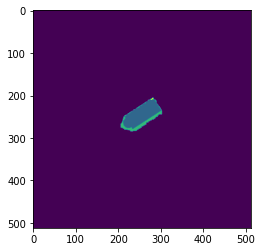

In [9]:

print("Accuracy",getAccuracy(sol,singleCluster))
print(getRealAccuracy(sol,singleCluster))
visual = visualizeError(sol,singleCluster)
plt.imshow(visual)

